<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p /usr/share/fonts/truetype/nanum
!wget https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true -O /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

--2024-08-16 06:40:07--  https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf [following]
--2024-08-16 06:40:07--  https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf [following]
--2024-08-16 06:40:08--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [3]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

import matplotlib.pyplot as plt

## 11-1

In [4]:
from math import cos, sin, asin
def great_circle_distance(x1, y1, x2, y2):
    delta_x, delta_y = x2 - x1, y2 - y1
    haversin = sin(delta_x / 2) ** 2 + np.product([cos(x1), cos(x2),
                                              sin(delta_y / 2) ** 2])
    return 2 * asin(haversin ** 0.5)

## 11-2

In [5]:
from math import pi
distance = great_circle_distance(0, 0, 0, pi)
print(f"거리는 {distance} 단위와 같습니다")

거리는 3.141592653589793 단위와 같습니다


<ipython-input-5-4ee38391d4a1>:2: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  distance = great_circle_distance(0, 0, 0, pi)


## 11-3

In [6]:
latitude_north, longitude_north = (90.0, 0)
latitude_south, longitude_south = (-90.0, 0)

## 11-4

In [7]:
to_radians = np.radians([latitude_north, longitude_north,
                       latitude_south, longitude_south])
distance = great_circle_distance(*to_radians.tolist())
print(f"두 극 사이의 단위원 거리는 {distance} 단위와 같습니다")

두 극 사이의 단위원 거리는 3.141592653589793 단위와 같습니다


<ipython-input-7-9bd156c0024a>:3: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  distance = great_circle_distance(*to_radians.tolist())


## 11-5

In [8]:
earth_distance = 3956 * distance
print(f"두 극 사이의 거리는 {earth_distance} 마일입니다")

두 극 사이의 거리는 12428.14053760122 마일입니다


## 11-6

In [9]:
def travel_distance(lat1, lon1, lat2, lon2):
    to_radians = np.radians([lat1, lon1, lat2, lon2])
    return 3956 * great_circle_distance(*to_radians.tolist())

assert travel_distance(90, 0, -90, 0) == earth_distance

<ipython-input-9-8834a6e6a126>:3: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  return 3956 * great_circle_distance(*to_radians.tolist())


## 11-7

In [10]:
!pip install --upgrade cython numpy pyshp six
!pip install shapely --no-binary shapely
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 74.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
accelerate 0.32.1 requires numpy<2.0.0,>=1.17, but you have numpy 2.0.1 which is incompatible.
albucore 0.0.13 requires numpy<2,>=1.24.4, but you have numpy 2.0.1 which is incompatible.
arviz 0.18.0 requires numpy<2.0,>=1.23.0, but you have numpy 2.0.1 which is incompatible.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 2.0.1 which is incompatible.
cupy-cuda12x 12.2.

In [11]:
import cartopy

## 11-8

In [12]:
from cartopy.crs import PlateCarree

## 11-9

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


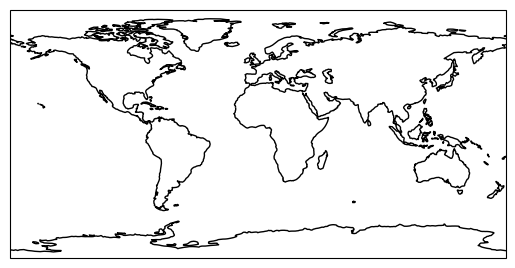

In [13]:
plt.axes(projection=PlateCarree()).coastlines()
plt.show()

## 11-10

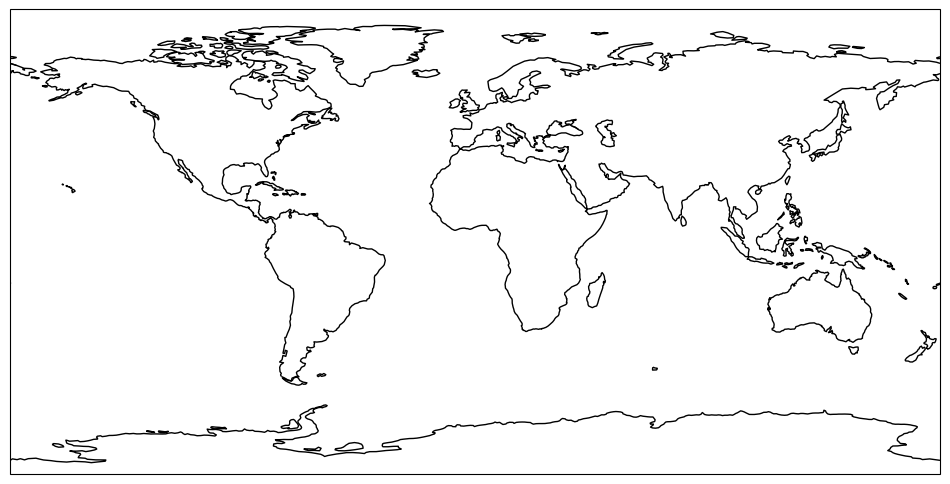

In [14]:
plt.figure(figsize=(12, 8))
plt.axes(projection=PlateCarree()).coastlines()
plt.show()

## 11-11

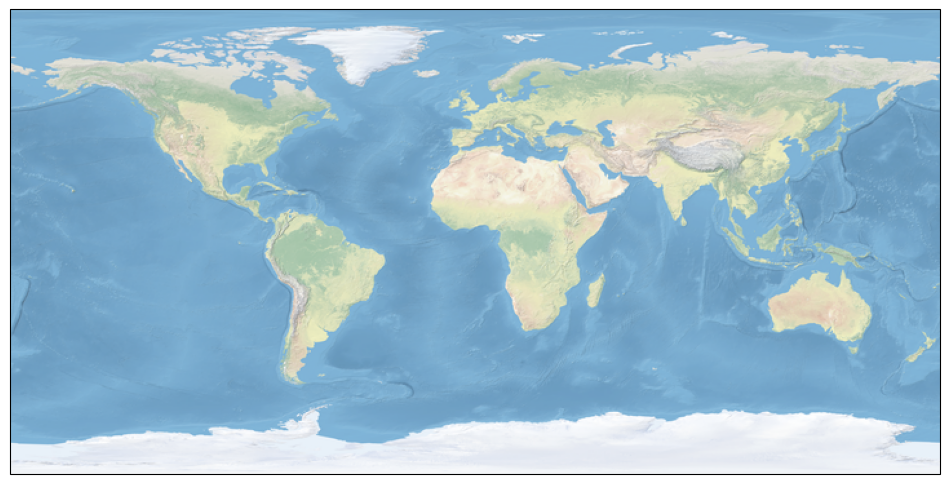

In [15]:
fig = plt.figure(figsize=(12, 8))
plt.axes(projection=PlateCarree()).stock_img()
plt.show()

## 11-12

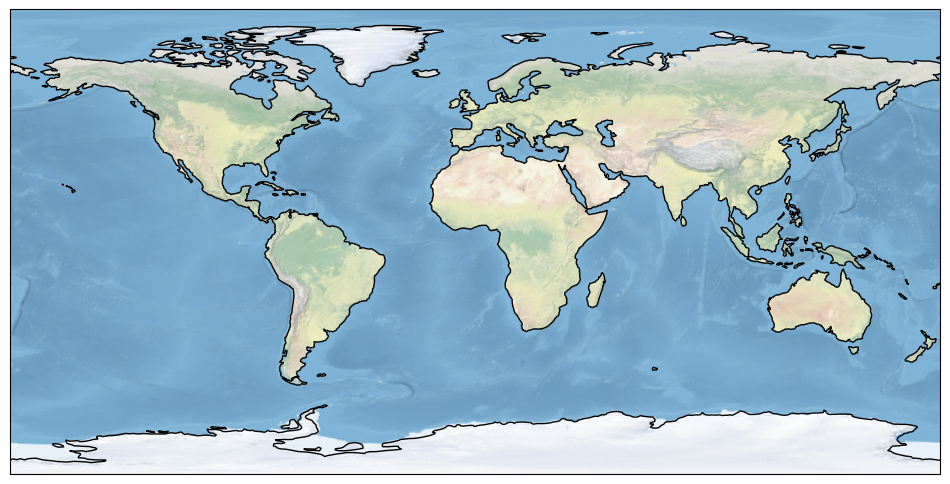

In [16]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=PlateCarree())
ax.coastlines()
ax.stock_img()
plt.show()

## 11-13

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


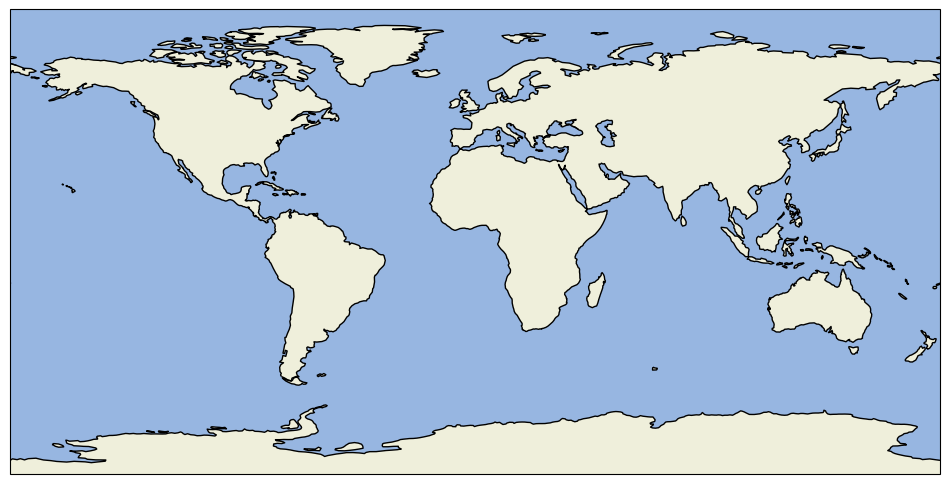

In [17]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)
plt.show()

## 11-14

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


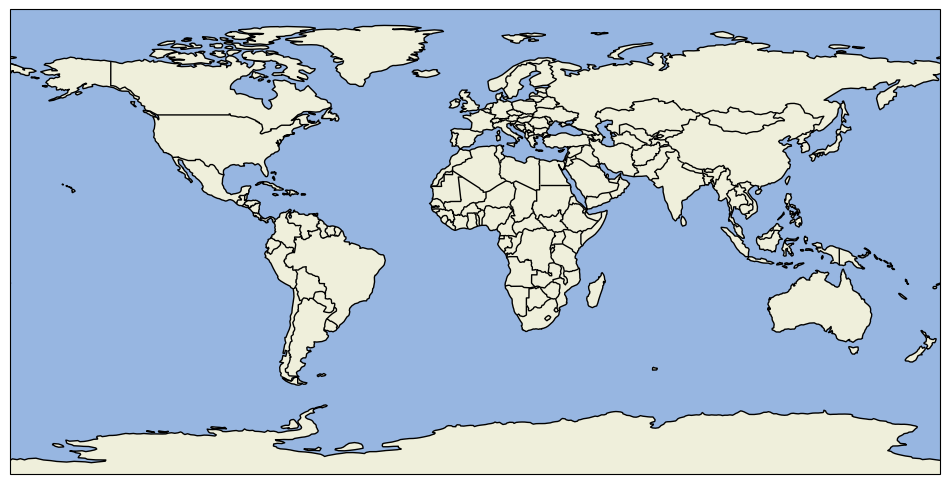

In [18]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)
plt.show()

## 11-15

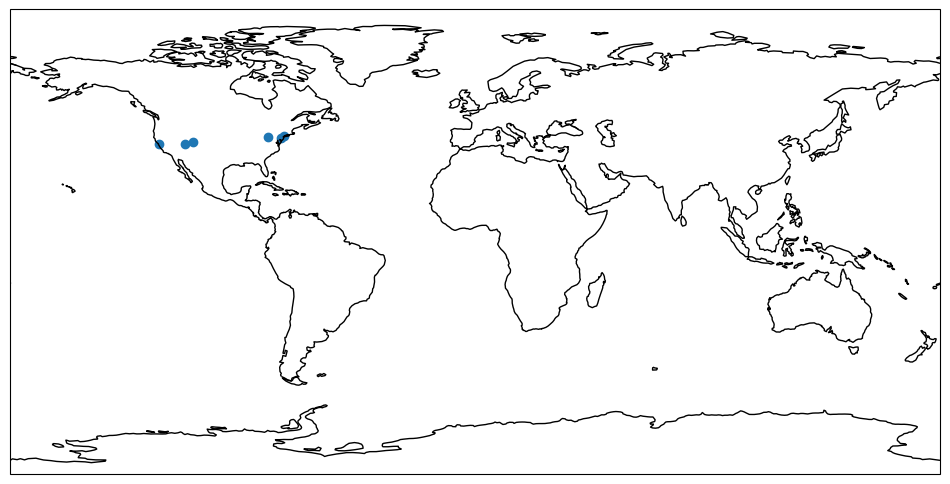

In [19]:
plt.figure(figsize=(12, 8))
coordinates = [(39.9526, -75.1652), (37.7749, -122.4194),
              (40.4406, -79.9959), (38.6807, -108.9769),
              (37.8716, -112.2727), (40.7831, -73.9712)]
latitudes, longitudes = np.array(coordinates).T
ax = plt.axes(projection=PlateCarree())
ax.scatter(longitudes, latitudes)
ax.set_global()
ax.coastlines()
plt.show()

## 11-16

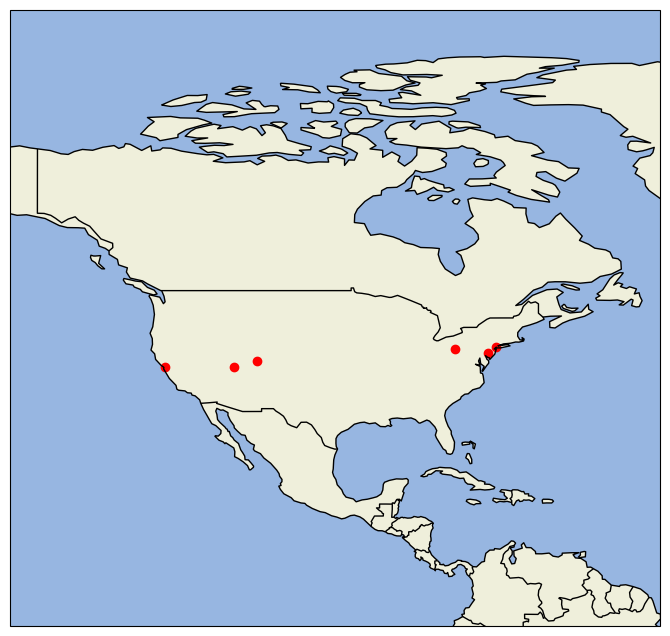

In [20]:
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=PlateCarree())
north_america_extent = (-145, -50, 0, 90)
ax.set_extent(north_america_extent)
ax.scatter(longitudes, latitudes, color='r')

def add_map_features():
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.LAND)

add_map_features()
plt.show()

## 11-17

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


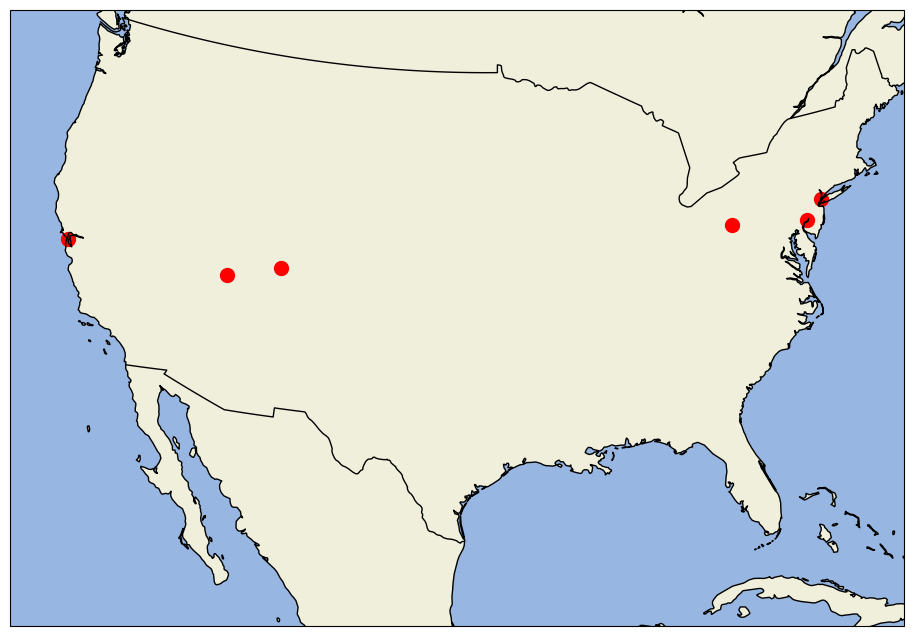

In [21]:
from cartopy.crs import LambertConformal
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=LambertConformal())
us_extent = (-120, -75, 20, 50)
ax.set_extent(us_extent)
ax.scatter(longitudes, latitudes, color='r',
         transform=PlateCarree(),
         s=100)
add_map_features()
plt.show()

## 11-18

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


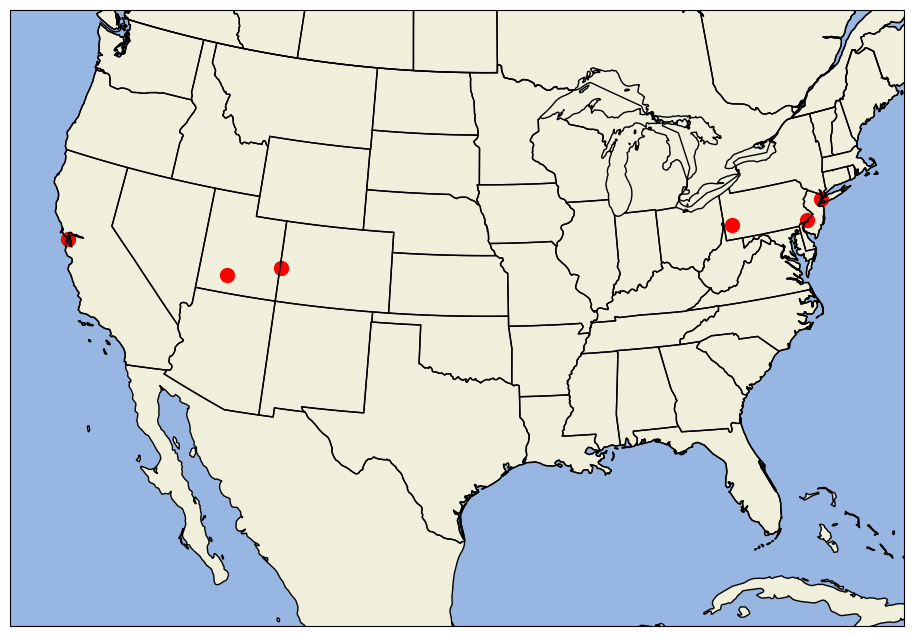

In [22]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=LambertConformal())
ax.set_extent(us_extent)

ax.scatter(longitudes, latitudes, color='r',
         transform=PlateCarree(),
         s=100)

ax.add_feature(cartopy.feature.STATES)
add_map_features()
plt.show()

## 11-19

In [24]:
!pip install geonamescache

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 29.3 MB/s eta 0:00:00


In [25]:
from geonamescache import GeonamesCache
gc = GeonamesCache()

## 11-20

In [27]:
continents = gc.get_continents()
print(continents.keys())

dict_keys(['AF', 'AS', 'EU', 'NA', 'OC', 'SA', 'AN'])


## 11-21

In [28]:
north_america = continents['NA']
print(north_america.keys())

dict_keys(['lng', 'geonameId', 'timezone', 'bbox', 'toponymName', 'asciiName', 'astergdem', 'fcl', 'population', 'wikipediaURL', 'adminName5', 'srtm3', 'adminName4', 'adminName3', 'alternateNames', 'cc2', 'adminName2', 'name', 'fclName', 'fcodeName', 'adminName1', 'lat', 'fcode', 'continentCode'])


## 11-22

In [29]:
for name_key in ['name', 'asciiName', 'toponymName']:
    print(north_america[name_key])

North America
North America
North America


## 11-23

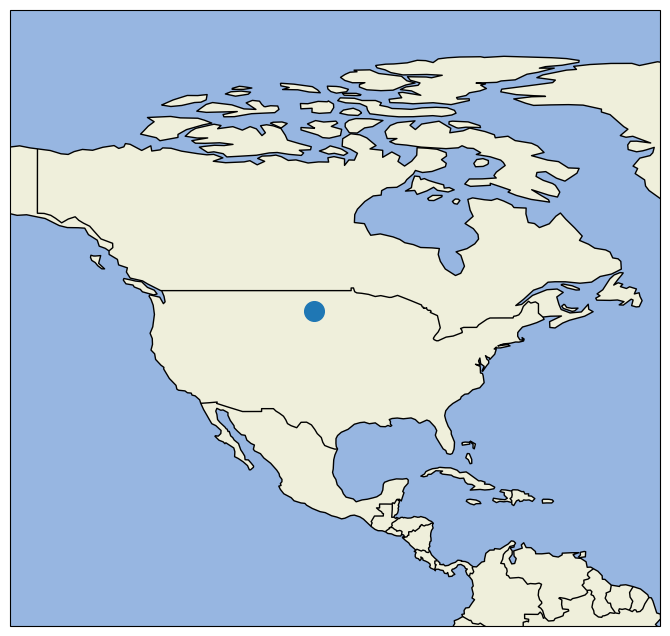

In [30]:
latitude = float(north_america['lat'])
longitude = float(north_america['lng'])

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=PlateCarree())
ax.set_extent(north_america_extent)
ax.scatter([longitude], [latitude], s=200)
add_map_features()
plt.show()

## 11-24

In [32]:
countries = gc.get_countries()
num_countries = len(countries)
print(f"GeonamesCache 에는 {num_countries} 개의 국가 정보가 담겨 있습니다.")

us_data = countries['US']
print("다음 데이터는 미국에 관한 것입니다")
print(us_data)

GeonamesCache 에는 252 개의 국가 정보가 담겨 있습니다.
다음 데이터는 미국에 관한 것입니다
{'geonameid': 6252001, 'name': 'United States', 'iso': 'US', 'iso3': 'USA', 'isonumeric': 840, 'fips': 'US', 'continentcode': 'NA', 'capital': 'Washington', 'areakm2': 9629091, 'population': 327167434, 'tld': '.us', 'currencycode': 'USD', 'currencyname': 'Dollar', 'phone': '1', 'postalcoderegex': '^\\d{5}(-\\d{4})?$', 'languages': 'en-US,es-US,haw,fr', 'neighbours': 'CA,MX,CU'}


## 11-25

In [34]:
us_neighbors = us_data['neighbours']
for neighbor_code in us_neighbors.split(','):
    print(countries[neighbor_code]['name'])

Canada
Mexico
Cuba


## 11-26

In [35]:
result = gc.get_countries_by_names()['United States']
assert result == countries['US']

## 11-27

In [37]:
cities = gc.get_cities()
num_cities = len(cities)
print(f"GeoNamesCache 에는 총 {num_cities} 개의 도시 정보가 담겨 있습니다.")
city_id = list(cities.keys())[0]
print(cities[city_id])

GeoNamesCache 에는 총 26463 개의 도시 정보가 담겨 있습니다.
{'geonameid': 3040051, 'name': 'les Escaldes', 'latitude': 42.50729, 'longitude': 1.53414, 'countrycode': 'AD', 'population': 15853, 'timezone': 'Europe/Andorra', 'admin1code': '08', 'alternatenames': ["Ehskal'des-Ehndzhordani", 'Escaldes', 'Escaldes-Engordany', 'Les Escaldes', 'esukarudesu=engorudani jiao qu', 'lai sai si ka er de-en ge er da', 'Эскальдес-Энджордани', 'エスカルデス＝エンゴルダニ教区', '萊塞斯卡爾德-恩戈爾達', '萊塞斯卡爾德－恩戈爾達']}


## 11-28

In [38]:
us_cities = [city for city in cities.values()
           if city['countrycode'] == 'US']
num_us_cities = len(us_cities)
print(f"GeoNamesCache는 미국의 {num_us_cities} 개의 도시 데이터를 가지고 있습니다")

GeoNamesCache는 미국의 3272 도시 데이터를 가지고 있습니다


## 11-29

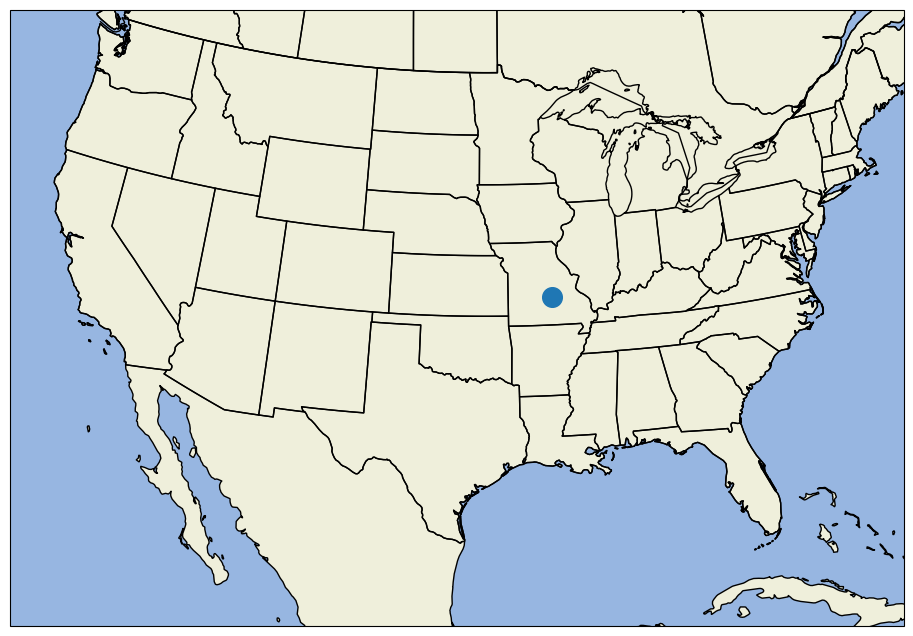

In [39]:
center_lat = np.mean([city['latitude']
                    for city in us_cities])
center_lon = np.mean([city['longitude']
                     for city in us_cities])

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=LambertConformal())
ax.set_extent(us_extent)
ax.scatter([center_lon], [center_lat], transform=PlateCarree(), s=200)
ax.add_feature(cartopy.feature.STATES)
add_map_features()
plt.show()

## 11-30

In [40]:
matched_cities_by_name = gc.get_cities_by_name('Philadelphia')
print(matched_cities_by_name)

[{'4560349': {'geonameid': 4560349, 'name': 'Philadelphia', 'latitude': 39.95238, 'longitude': -75.16362, 'countrycode': 'US', 'population': 1576251, 'timezone': 'America/New_York', 'admin1code': 'PA', 'alternatenames': ['Coaquannock', 'Fi-sang', 'Fi-sàng', "Filadehl'fija", "Filadel'fi", "Filadel'fij", "Filadel'fija", 'Filadelfi', 'Filadelfia', 'Filadelfiae', 'Filadelfie', 'Filadelfii', 'Filadelfija', 'Filadelfijo', 'Filadelfio', 'Filadelfiya', 'Filadelfiye', 'Filadelfiä', 'Filadèlfia', 'Filadélfia', 'Filadélfiye', 'Ga-na-ta-jen-go-na', 'PHL', 'Phila', 'Philadelpheia', 'Philadelphia', 'Philadelphie', 'Philly', 'Quequenakee', 'Tsi wahswen:to Tekahso:ken', 'Tsi wahswèn:to Tekahsó:ken', 'fei cheng', 'fi la delfeiy', "filadailafi'a", 'firaderufia', 'flaڈylfya', 'fyladlfya', 'fyladlfya  pnsylwanya', 'philadelaphiya', 'philadelphiya', 'piladelpia', 'pilatelpiya', 'pilladelpia', 'pyldlpyh', 'Φιλαδέλφεια', 'Филаделфиа', 'Филаделфия', 'Филаделфија', 'Филадельфи', 'Филадельфий', 'Филадельфия', '

## 11-31

In [41]:
matched_cities_list = gc.get_cities_by_name('San Francisco')

for i, san_francisco in enumerate(matched_cities_list):
    city_info = list(san_francisco.values())[0]
    country_code = city_info['countrycode']
    country = countries[country_code]['name']
    print(f"{i}번 인덱스의 샌프란시스코는 {country}에 위치합니다")

0번 인덱스의 샌프란시스코는 Argentina에 위치합니다
1번 인덱스의 샌프란시스코는 Costa Rica에 위치합니다
2번 인덱스의 샌프란시스코는 Philippines에 위치합니다
3번 인덱스의 샌프란시스코는 Philippines에 위치합니다
4번 인덱스의 샌프란시스코는 El Salvador에 위치합니다
5번 인덱스의 샌프란시스코는 United States에 위치합니다


## 11-32

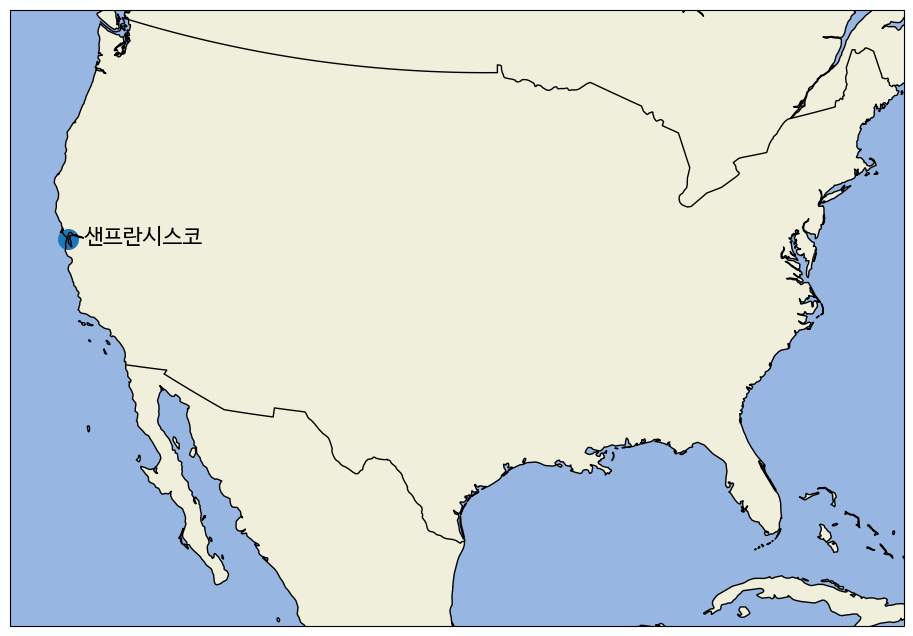

In [43]:
best_sf = max(gc.get_cities_by_name('San Francisco'),
             key=lambda x: list(x.values())[0]['population'])
sf_data = list(best_sf.values())[0]
sf_lat = sf_data['latitude']
sf_lon = sf_data['longitude']

plt.figure(figsize=(12, 8))
ax = plt.axes(projection=LambertConformal())
ax.set_extent(us_extent)
ax.scatter(sf_lon, sf_lat, transform=PlateCarree(), s=200)
add_map_features()
ax.text(sf_lon + 1, sf_lat, '샌프란시스코', fontsize=16,
    transform=PlateCarree())
plt.show()

## 11-33

In [44]:
for ny_name in ['New York', 'New York City']:
    if not gc.get_cities_by_name(ny_name):
        print(f"'{ny_name}'은 GeoNamesCache 데이터베이스에 없습니다")
    else:
        print(f"'{ny_name}'는 GeoNamesCache 데이터베이스에 있습니다")

'New York'은 GeoNamesCache 데이터베이스에 없습니다
'New York City'는 GeoNamesCache 데이터베이스에 있습니다


## 11-34

In [45]:
print(gc.get_cities_by_name(u'Cañon City'))
print(gc.get_cities_by_name(u'Hagåtña'))

[{'5416005': {'geonameid': 5416005, 'name': 'Cañon City', 'latitude': 38.44098, 'longitude': -105.24245, 'countrycode': 'US', 'population': 16400, 'timezone': 'America/Denver', 'admin1code': 'CO', 'alternatenames': ['CNE', 'Canon City', 'Canyon City', 'Cañon City', 'East Canon', 'Kanon Siti', 'Kanono siti', 'Keniun Siti', 'kann syty  klradw', 'kanwn syty', 'kyanana siti', 'Каноно сити', 'Кањон Сити', 'Кениън Сити', 'كانون سيتي', 'کانن سیتی، کلرادو', 'کینن سٹی، کولوراڈو', 'क्यानन सिटी']}}]
[{'4044012': {'geonameid': 4044012, 'name': 'Hagåtña', 'latitude': 13.47567, 'longitude': 144.74886, 'countrycode': 'GU', 'population': 1051, 'timezone': 'Pacific/Guam', 'admin1code': 'AN', 'alternatenames': ['Agadna', 'Agana', 'Agana -1998', 'Agania', 'Aganija', 'Aganja', 'Agano', 'Agaña', 'Aguana', 'Akashi', 'Akashi - JP renamed WW2', 'Ankana', 'City of Ignacio de Agana', 'City of Saint Ignacio de Agana', 'Ciudad de San Ignacio de Agana', 'Hagadna', 'Hagatna', 'Hagåtña', 'Haqatna', 'Jagatna', 'Khaga

## 11-35

In [47]:
!pip install Unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 7.2 MB/s eta 0:00:00


In [48]:
from unidecode import unidecode
accented_names = [city['name'] for city in gc.get_cities().values()
                  if city['name'] != unidecode(city['name'])]
num_accented_cities = len(accented_names)

print(f"발음 구별 기호를 가진 도시명의 한 가지 예시는 '{accented_names[0]}'입니다")
print(f"{num_accented_cities} 개의 도시명에 발음 구별 기호가 있습니다")

발음 구별 기호를 가진 도시명의 한 가지 예시는 'Khawr Fakkān'입니다
5034 개의 도시명에 발음 구별 기호가 있습니다


## 11-36

In [49]:
alternative_names = {unidecode(name): name
                    for name in accented_names}
print(gc.get_cities_by_name(alternative_names['Hagatna']))

[{'4044012': {'geonameid': 4044012, 'name': 'Hagåtña', 'latitude': 13.47567, 'longitude': 144.74886, 'countrycode': 'GU', 'population': 1051, 'timezone': 'Pacific/Guam', 'admin1code': 'AN', 'alternatenames': ['Agadna', 'Agana', 'Agana -1998', 'Agania', 'Aganija', 'Aganja', 'Agano', 'Agaña', 'Aguana', 'Akashi', 'Akashi - JP renamed WW2', 'Ankana', 'City of Ignacio de Agana', 'City of Saint Ignacio de Agana', 'Ciudad de San Ignacio de Agana', 'Hagadna', 'Hagatna', 'Hagåtña', 'Haqatna', 'Jagatna', 'Khagatna', 'San Ignacio de Agana *', "Ville d'Agana", "Vjoska Agan'ja", 'a jia ni ya', 'akatna', 'ha katya', 'hagania', 'hagasnya', 'hagatna', 'hagatnya', 'haghatnya', "hegatn'ya", 'Αγκάνα', 'Вёска Аганья', 'Хагатна', 'Хагатња', 'Հագատնա', 'هاغاتنيا', 'هاگاتنا', 'هاگاتنیا', 'हेगात्न्या', 'அகாத்ன', 'ฮากาตญา', 'ჰაგატნა', 'ハガニア', '阿加尼亚', '하갓냐']}}]


## 11-37

In [50]:
text = 'This sentence matches Hagatna'
for key, value in alternative_names.items():
    if key in text:
        print(gc.get_cities_by_name(value))
        break

[{'4044012': {'geonameid': 4044012, 'name': 'Hagåtña', 'latitude': 13.47567, 'longitude': 144.74886, 'countrycode': 'GU', 'population': 1051, 'timezone': 'Pacific/Guam', 'admin1code': 'AN', 'alternatenames': ['Agadna', 'Agana', 'Agana -1998', 'Agania', 'Aganija', 'Aganja', 'Agano', 'Agaña', 'Aguana', 'Akashi', 'Akashi - JP renamed WW2', 'Ankana', 'City of Ignacio de Agana', 'City of Saint Ignacio de Agana', 'Ciudad de San Ignacio de Agana', 'Hagadna', 'Hagatna', 'Hagåtña', 'Haqatna', 'Jagatna', 'Khagatna', 'San Ignacio de Agana *', "Ville d'Agana", "Vjoska Agan'ja", 'a jia ni ya', 'akatna', 'ha katya', 'hagania', 'hagasnya', 'hagatna', 'hagatnya', 'haghatnya', "hegatn'ya", 'Αγκάνα', 'Вёска Аганья', 'Хагатна', 'Хагатња', 'Հագատնա', 'هاغاتنيا', 'هاگاتنا', 'هاگاتنیا', 'हेगात्न्या', 'அகாத்ன', 'ฮากาตญา', 'ჰაგატნა', 'ハガニア', '阿加尼亚', '하갓냐']}}]


## 11-38

In [51]:
assert 'Boston' in 'Boston Marathon'
assert 'Boston Marathon'.startswith('Boston')
assert 'Boston Marathon'.endswith('Boston') == False

## 11-39

In [52]:
assert 'in a' in 'sin apple'
assert 'in a' in 'win attached'

## 11-40

In [53]:
import re
regex = 'Boston'
random_text = 'Clown Patty'
match = re.search(regex, random_text)
assert match is None

matchable_text = 'Boston Marathon'
match = re.search(regex, matchable_text)
assert match is not None
start, end = match.start(), match.end()
matched_string = matchable_text[start: end]
assert matched_string == 'Boston'

## 11-41

In [54]:
for text in ['BOSTON', 'boston', 'BoSTOn']:
    assert re.search(regex, text, flags=re.IGNORECASE) is not None

## 11-42

In [55]:
for regex in ['\\bin a\\b', r'\bin a\b']:
    for text in ['sin apple', 'win attached']:
        assert re.search(regex, text) is None

    text = 'Match in a string'
    assert re.search(regex, text) is not None

## 11-43

In [56]:
regex = r'I visited \b(Boston|Philadelphia|San Francisco)\b yesterday.'
assert re.search(regex, 'I visited Chicago yesterday.') is None

cities = ['Boston', 'Philadelphia', 'San Francisco']
for city in cities:
    assert re.search(regex, f'I visited {city} yesterday.') is not None

## 11-44

In [57]:
compiled_re = re.compile(regex)
text = 'I visited Boston yesterday.'
for i in range(1000):
    assert compiled_re.search(text) is not None